In [ ]:
# Larval Zebra Fish
# Neurons visualization
# 2D whole brain colored plots
# Connectivity matrix of splitted 2D grid

In [1]:
# Installing neurom
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install neurom
import neurom as nm
from neurom.view.matplotlib_impl import plot_morph

def figure():
    fig, ax = plt.subplots(figsize=[6, 8], sharex=True, sharey=True)
    ax.set_aspect('equal')
    ax.axis("off")
    plt.gca().invert_yaxis()

    return fig, ax

In [2]:
# provide path to the data folder
folder_path = "./Aligned/Original"

In [3]:
# Filtering and loading the data
# Filtering
neuron_paths = []
for file in os.listdir(folder_path):
    neuron_path = folder_path + '/' + file

    try:
        m = nm.load_morphology(neuron_path) # try to load the morphology
        neuron_paths.append(neuron_path) # if this works appened the path to neuron_paths
    except:
        pass # otherwise just skip this neuron

print("Loaded " + str(len(neuron_paths)) + " of " + str(len(os.listdir(folder_path))) + " neurons.")


./Aligned/Original/FT_T_maG_7.swc:2462:warning

./Aligned/Original/FT_T_maG_7.swc:2461:warning

./Aligned/Original/FT_T_maG_7.swc:2460:warning

./Aligned/Original/FT_T_maG_7.swc:2459:warning

./Aligned/Original/FT_T_maG_7.swc:2458:warning

./Aligned/Original/FT_T_maG_7.swc:2457:warning

./Aligned/Original/FT_T_maG_7.swc:2456:warning

./Aligned/Original/FT_T_maG_7.swc:2455:warning

./Aligned/Original/FT_T_maG_7.swc:2454:warning

./Aligned/Original/FT_T_maG_7.swc:2453:warning

./Aligned/Original/FT_T_maG_7.swc:2452:warning

./Aligned/Original/FT_T_maG_7.swc:2451:warning

./Aligned/Original/FT_T_maG_7.swc:2450:warning

./Aligned/Original/FT_T_maG_7.swc:2449:warning

./Aligned/Original/FT_T_maG_7.swc:2448:warning

./Aligned/Original/FT_T_maG_7.swc:2447:warning

./Aligned/Original/FT_T_maG_7.swc:2446:warning

./Aligned/Original/FT_T_maG_7.swc:2445:warning

./Aligned/Original/FT_T_maG_7.swc:2444:warning

./Aligned/Original/FT_T_maG_7.swc:2443:warning

./Aligned/Original/FT_T_maG_7.swc:2442:

Loaded 3175 of 4327 neurons.


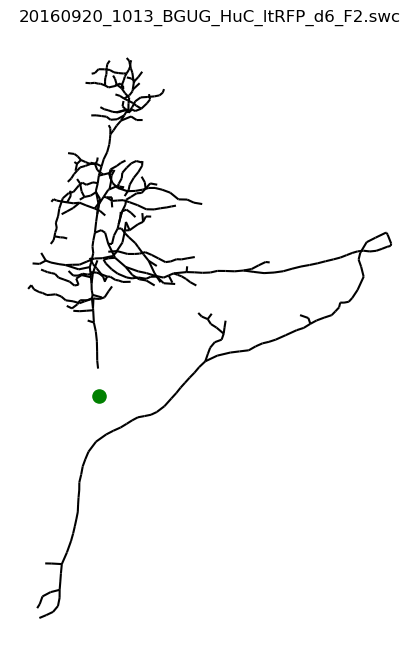

In [4]:
# Plotting single neurons in 2d 
n = np.random.randint(low=0, high=len(neuron_paths)) # sample a random neuron
m = nm.load_morphology(neuron_paths[n]) # load it's morphology

fig, ax = figure()
plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.5, color='k', alpha=1.0)
#plt.scatter(m.points[:,0], m.points[:,1], color='xkcd:grey')
plt.scatter(m.soma.center[0], m.soma.center[1], s=90, color='g')

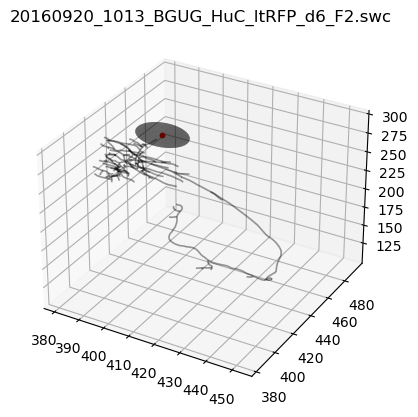

In [5]:
# Plotting a Neuron in 3D
# Plotting single neurons in 3d
from neurom.view.matplotlib_impl import plot_morph3d

fig = plt.figure()
ax = plt.axes(projection='3d')
plot_morph3d(m, ax=ax, color='k', alpha=0.4, diameter_scale=None, linewidth=1.2)
ax.scatter(m.soma.center[0], m.soma.center[1], m.soma.center[2], s=10, color='r')

In [6]:
from matplotlib.image import imread
bg_image = imread('zebra-fish-bg.png')

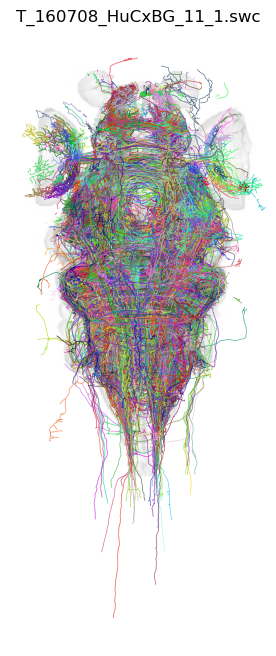

In [7]:
import random

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Plot all of the neurons together
fig, ax = figure()
left, right, bottom, top = 30, 550, 980, 60
ax.imshow(bg_image, extent=[left, right, bottom, top])  # Set the extent to match the actual size of your plot
for i, path in enumerate(neuron_paths):
  # if i > 400:
  #   break
  currentPath = path
  m = nm.load_morphology(currentPath) # load it's morphology

  try:
    color = random_color()
    plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, color=color, linewidth=0.5, alpha=0.8)
    #plt.scatter(m.points[:,0], m.points[:,1], color=color)
    #plt.scatter(m.soma.center[0], m.soma.center[1], s=1, color=color)
  except ValueError as e:
    print(f"An error occurred with neuron: {e}")
    # Skip this neuron and continue with the next
    pass

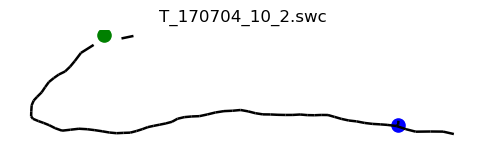

In [8]:
# Input to output neuron (soma to furthest)
# Define the output point for a single neuron
n = np.random.randint(low=0, high=len(neuron_paths))
m = nm.load_morphology(neuron_paths[n])

import math

def distance_3d(point1, point2):
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 + (point2[2] - point1[2])**2)

max_distance = float("-inf")
max_output = m.soma.center

for point in m.points:
  distance = distance_3d(point, m.soma.center)
  if (distance > max_distance):
    max_distance = distance
    max_output = point

# Check that this seems to work by plotting some data
fig, ax = figure()
plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.8, color='k', alpha=1.0)
plt.scatter(max_output[0], max_output[1], s=90, color='b')
plt.scatter(m.soma.center[0], m.soma.center[1], s=90, color='g')

In [9]:
# Calculate inputs / outputs lists
# Define each neurons input and output point
inputs, outputs = [], []

for i, path in enumerate(neuron_paths):
  try:
    currentPath = path
    m = nm.load_morphology(currentPath) # load it's morphology

    max_distance = float("-inf")
    max_output = m.soma.center

    for point in m.points:
      distance = distance_3d(point, m.soma.center)
      if (distance > max_distance):
        max_distance = distance
        max_output = point

    inputs.append(m.soma.center)
    outputs.append(max_output)
  except:
    pass

assert len(inputs) == len(outputs)
# Use an assert statement at the end of your code

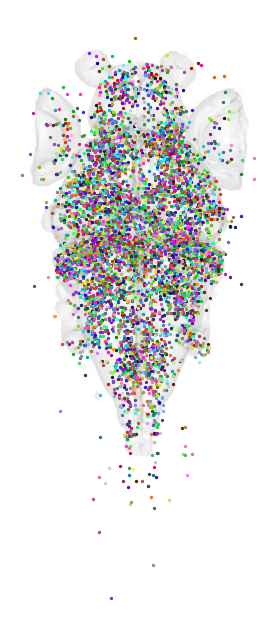

In [10]:
import random

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Plot all of the neurons together in line form (input-output point)
fig, ax = figure()
ax.imshow(bg_image, extent=[left, right, bottom, top])  # Set the extent to match the actual size of your plot

for i, v in enumerate(inputs):
  p1 = inputs[i]
  p2 = outputs[i]
  # Define your points
  point1 = (p1[0], p1[1], p1[2])  # Replace with your point1 coordinates
  point2 = (p2[0], p2[1], p2[2])  # Replace with your point2 coordinates
  color = random_color()

  # Draw a line between point1 and point2
  #ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color, linewidth=0.5)

  # Optionally, you can add markers for the points themselves
  ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=color, s=2)


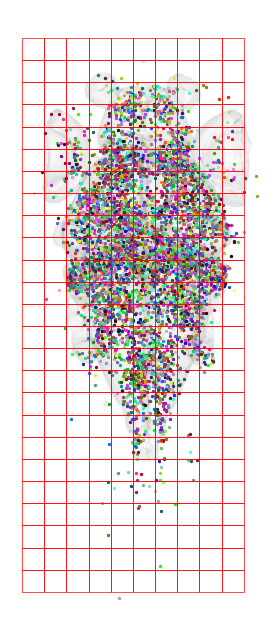

In [11]:
# Divide the brain into a 3d grid
import numpy as np
import random
import matplotlib.patches as patches

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# think about cell size
cell_size = 50

max_X = float("-inf")
max_Y = float("-inf")
max_Z = float("-inf")

# find maximum for each dimension to know the size of the grid
for i, v in enumerate(inputs):
  input = inputs[i]
  output = outputs[i]
  if input[0] > max_X:
    max_X = input[0]
  if input[1] > max_Y:
    max_Y = input[1]
  if input[2] > max_Z:
    max_Z = input[2]

  if output[0] > max_X:
    max_X = output[0]
  if output[1] > max_Y:
    max_Y = output[1]
  if output[2] > max_Z:
    max_Z = output[2]

x_dim = int(max_X / cell_size) # for instance, 52 cells of size 10
y_dim = int(max_Y / cell_size)
z_dim = int(max_Z / cell_size)

threeDBrain = np.zeros((x_dim, y_dim, z_dim))

num_voxels = x_dim * y_dim
connectivityMatrix = np.zeros((num_voxels, num_voxels))

def voxel_to_index(x, y, x_dim):
    return y * x_dim + x

for i, v in enumerate(inputs):
  input = inputs[i]
  output = outputs[i]

  i_x = int(input[0]/cell_size) - 1
  i_y = int(input[1]/cell_size) - 1
  i_z = int(input[2]/cell_size) - 1

  threeDBrain[i_x, i_y, i_z] += 1

  o_x = int(output[0]/cell_size) - 1
  o_y = int(output[1]/cell_size) - 1
  o_z = int(output[2]/cell_size) - 1

  threeDBrain[o_x, o_y, o_z] += 1

  input_idx = voxel_to_index(i_x, i_y, x_dim)
  output_idx = voxel_to_index(o_x, o_y, x_dim)

  connectivityMatrix[input_idx][output_idx] += 1

fig, ax = figure()
ax.imshow(bg_image, extent=[left, right, bottom, top])

# draw the input,output so we can overlap over the cells
for i, v in enumerate(inputs):
  p1 = inputs[i]
  p2 = outputs[i]
  # Define your points
  point1 = (p1[0], p1[1], p1[2])  # Replace with your point1 coordinates
  point2 = (p2[0], p2[1], p2[2])  # Replace with your point2 coordinates
  color = random_color()

  # Optionally, you can add markers for the points themselves
  ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=color, s=2)

#Iterate over the range of the dimensions
for i in range(x_dim):
    for j in range(y_dim):
        # Calculate the bottom-left corner of each cell
        lower_left_x = i * cell_size
        lower_left_y = j * cell_size

        # Create a rectangle
        rect = patches.Rectangle((lower_left_x, lower_left_y), cell_size, cell_size, linewidth=0.5, edgecolor='r', facecolor='none')

        # Add the rectangle to the plot
        ax.add_patch(rect)

# # Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

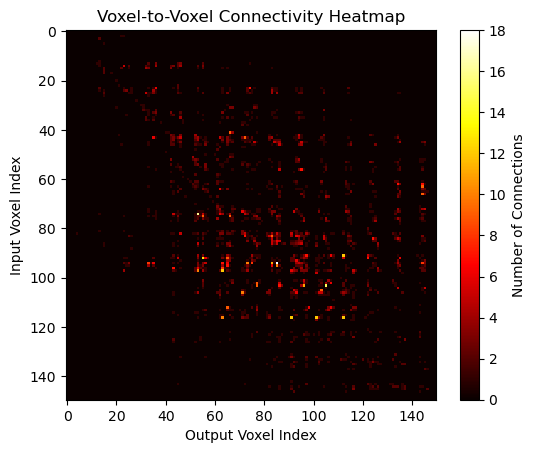

In [12]:
# Plot a connectivity matrix for the above 3D grid, later we will improve it
#Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap
cax = ax.imshow(connectivityMatrix[:150, :150], vmin=0, vmax=18, cmap='hot', interpolation='nearest')

# Add a color bar
cbar = fig.colorbar(cax)
cbar.set_label('Number of Connections')

# Add labels and title (optional)
ax.set_xlabel('Output Voxel Index')
ax.set_ylabel('Input Voxel Index')
ax.set_title('Voxel-to-Voxel Connectivity Heatmap')

# Show the plot
plt.show()

In [13]:
# Split the brain data by using the location provided by the Celullar-Resolution Atlas of the Larval Zebra Fish
# Define brain regions without morphology

# First define and parse the JSON structure for parts
import json

regions_json = '''
  [{
    "name": "L_Thalamus",
    "x": "220",
    "y": "312",
    "z": "179",
    "abbr": "th",
    "vol": "984842"
  }, {
    "name": "L_Torus semicircularis",
    "x": "126",
    "y": "433",
    "z": "157",
    "abbr": "ts",
    "vol": "450263"
  }, {
    "name": "L_Tegmentum",
    "x": "199",
    "y": "436",
    "z": "188",
    "abbr": "t",
    "vol": "683361"
  }, {
    "name": "L_Medualla Oblongata strip 1",
    "x": "243",
    "y": "640",
    "z": "245",
    "abbr": "mos1",
    "vol": "601111"
  }, {
    "name": "R_Thalamus",
    "x": "345",
    "y": "311",
    "z": "179",
    "abbr": "Th",
    "vol": "946196"
  }, {
    "name": "R_Torus semicircularis",
    "x": "440",
    "y": "431",
    "z": "157",
    "abbr": "TS",
    "vol": "455121"
  }, {
    "name": "R_Tegmentum",
    "x": "370",
    "y": "435",
    "z": "188",
    "abbr": "T",
    "vol": "676192"
  }, {
    "name": "R_Medualla Oblongata strip 1",
    "x": "327",
    "y": "641",
    "z": "245",
    "abbr": "MOS1",
    "vol": "691010"
  }, {
    "name": "R_Medualla Oblongata strip 5",
    "x": "349",
    "y": "691",
    "z": "286",
    "abbr": "MOS5",
    "vol": "567318"
  }, {
    "name": "L_Medualla Oblongata strip 4",
    "x": "216",
    "y": "686",
    "z": "209",
    "abbr": "mos4",
    "vol": "341466"
  }, {
    "name": "R_Medualla Oblongata strip 4",
    "x": "353",
    "y": "686",
    "z": "281",
    "abbr": "MOS4",
    "vol": "529316"
  }, {
    "name": "L_Medualla Oblongata strip 5",
    "x": "220",
    "y": "694",
    "z": "286",
    "abbr": "mos5",
    "vol": "559564"
  }, {
    "name": "L_Medial octavolateral nucleus",
    "x": "187",
    "y": "611",
    "z": "292",
    "abbr": "mon",
    "vol": "457585"
  }, {
    "name": "R_Medial octavolateral nucleus",
    "x": "384",
    "y": "612",
    "z": "292",
    "abbr": "MON",
    "vol": "461773"
  }, {
    "name": "R_Cerebellum",
    "x": "383",
    "y": "507",
    "z": "260",
    "abbr": "Ce",
    "vol": "1139670"
  }, {
    "name": "L_Cerebellum",
    "x": "187",
    "y": "504",
    "z": "260",
    "abbr": "ce",
    "vol": "1087593"
  }, {
    "name": "R_Medualla Oblongata strip 3",
    "x": "352",
    "y": "577",
    "z": "209",
    "abbr": "MOS3",
    "vol": "341466"
  }, {
    "name": "L_Medualla Oblongata strip 3",
    "x": "216",
    "y": "585",
    "z": "209",
    "abbr": "mos3",
    "vol": "359462"
  }, {
    "name": "R_Pretectum",
    "x": "352",
    "y": "325",
    "z": "221",
    "abbr": "Pr",
    "vol": "422166"
  }, {
    "name": "L_Pretectum",
    "x": "214",
    "y": "325",
    "z": "221",
    "abbr": "pr",
    "vol": "439624"
  }, {
    "name": "R_Intermediate hypothalamus",
    "x": "357",
    "y": "416",
    "z": "96",
    "abbr": "Hi",
    "vol": "1032515"
  }, {
    "name": "R_Interpeduncular nucleus",
    "x": "263",
    "y": "483",
    "z": "140",
    "abbr": "Nln",
    "vol": "94691"
  }, {
    "name": "R_Caudal hypothalamus",
    "x": "340",
    "y": "516",
    "z": "90",
    "abbr": "Hc",
    "vol": "128417"
  }, {
    "name": "L_Caudal hypothalamus",
    "x": "229",
    "y": "515",
    "z": "90",
    "abbr": "hc",
    "vol": "124595"
  }, {
    "name": "L_Intermediate hypothalamus",
    "x": "209",
    "y": "417",
    "z": "96",
    "abbr": "hi",
    "vol": "1072225"
  }, {
    "name": "L_Interpeduncular nucleus",
    "x": "304",
    "y": "484",
    "z": "140",
    "abbr": "nln",
    "vol": "94181"
  }, {
    "name": "R_Preoptic region",
    "x": "313",
    "y": "256",
    "z": "106",
    "abbr": "PO",
    "vol": "263312"
  }, {
    "name": "L_Preoptic region",
    "x": "254",
    "y": "256",
    "z": "106",
    "abbr": "po",
    "vol": "270516"
  }, {
    "name": "R_Posterior tuberculum",
    "x": "307",
    "y": "347",
    "z": "108",
    "abbr": "PT",
    "vol": "220375"
  }, {
    "name": "L_Posterior tuberculum",
    "x": "258",
    "y": "348",
    "z": "108",
    "abbr": "pt",
    "vol": "241444"
  }, {
    "name": "R_Pallium",
    "x": "338",
    "y": "180",
    "z": "177",
    "abbr": "P",
    "vol": "728949"
  }, {
    "name": "L_Pallium",
    "x": "228",
    "y": "180",
    "z": "177",
    "abbr": "p",
    "vol": "736075"
  }, {
    "name": "R_Subpallium",
    "x": "322",
    "y": "169",
    "z": "113",
    "abbr": "S",
    "vol": "434308"
  }, {
    "name": "L_Subpallium",
    "x": "245",
    "y": "167",
    "z": "113",
    "abbr": "s",
    "vol": "413101"
  }, {
    "name": "L_Medualla Oblongata strip 2",
    "x": "260",
    "y": "710",
    "z": "279",
    "abbr": "mos2",
    "vol": "273669"
  }, {
    "name": "R_Medualla Oblongata strip 2",
    "x": "308",
    "y": "710",
    "z": "279",
    "abbr": "MOS2",
    "vol": "294387"
  }, {
    "name": "L_Vagal region",
    "x": "214",
    "y": "762",
    "z": "297",
    "abbr": "vr",
    "vol": "76777"
  }, {
    "name": "R_Octaval ganglion",
    "x": "374",
    "y": "554",
    "z": "100",
    "abbr": "OG",
    "vol": "59294"
  }, {
    "name": "R_Trigeminal ganglion",
    "x": "458",
    "y": "445",
    "z": "101",
    "abbr": "TG",
    "vol": "65532"
  }, {
    "name": "L_Trigeminal ganglion",
    "x": "109",
    "y": "446",
    "z": "101",
    "abbr": "tg",
    "vol": "81547"
  }, {
    "name": "L_Glossopharyngeal ganglion",
    "x": "164",
    "y": "566",
    "z": "4",
    "abbr": "gg",
    "vol": "23784"
  }, {
    "name": "R_Glossopharyngeal ganglion",
    "x": "409",
    "y": "570",
    "z": "40",
    "abbr": "GG",
    "vol": "9314"
  }, {
    "name": "R_Olfactory epithelium",
    "x": "381",
    "y": "101",
    "z": "118",
    "abbr": "OE",
    "vol": "236153"
  }, {
    "name": "L_Olfactory epithelium",
    "x": "183",
    "y": "101",
    "z": "118",
    "abbr": "oe",
    "vol": "256155"
  }, {
    "name": "R_Vagal region",
    "x": "357",
    "y": "763",
    "z": "297",
    "abbr": "VR",
    "vol": "49632"
  }, {
    "name": "L_Octaval ganglion",
    "x": "196",
    "y": "556",
    "z": "100",
    "abbr": "og",
    "vol": "64702"
  }, {
    "name": "R_Inferior olive",
    "x": "319",
    "y": "744",
    "z": "199",
    "abbr": "IO",
    "vol": "12492"
  }, {
    "name": "L_Vagus motor neurons",
    "x": "245",
    "y": "756",
    "z": "298",
    "abbr": "nx",
    "vol": "170538"
  }, {
    "name": "R_Vagus motor neurons",
    "x": "326",
    "y": "757",
    "z": "298",
    "abbr": "NX",
    "vol": "188491"
  }, {
    "name": "L_Inferior olive",
    "x": "254",
    "y": "745",
    "z": "199",
    "abbr": "io",
    "vol": "10891"
  }, {
    "name": "R_Retina",
    "x": "474",
    "y": "248",
    "z": "93",
    "abbr": "Ret",
    "vol": "3805342"
  }, {
    "name": "L_Torus longitudinalis",
    "x": "262",
    "y": "326",
    "z": "294",
    "abbr": "tl",
    "vol": "58442"
  }, {
    "name": "R_Torus longitudinalis",
    "x": "303",
    "y": "328",
    "z": "294",
    "abbr": "TL",
    "vol": "46938"
  }, {
    "name": "L_Retina",
    "x": "84",
    "y": "255",
    "z": "93",
    "abbr": "ret",
    "vol": "4658432"
  }, {
    "name": "L_Pituitary",
    "x": "270",
    "y": "458",
    "z": "55",
    "abbr": "pit",
    "vol": "29676"
  }, {
    "name": "R_Pituitary",
    "x": "299",
    "y": "457",
    "z": "55",
    "abbr": "Pit",
    "vol": "39978"
  }, {
    "name": "R_Rostral hypothalamus",
    "x": "314",
    "y": "372",
    "z": "63",
    "abbr": "Hr",
    "vol": "188048"
  }, {
    "name": "L_Rostral hypothalamus",
    "x": "253",
    "y": "370",
    "z": "63",
    "abbr": "hr",
    "vol": "195773"
  }, {
    "name": "R_Tectum",
    "x": "388",
    "y": "381",
    "z": "257",
    "abbr": "TeO",
    "vol": "3170917"
  }, {
    "name": "L_Tectum",
    "x": "179",
    "y": "386",
    "z": "257",
    "abbr": "teo",
    "vol": "3235995"
  }, {
    "name": "R_Olfactory bulb",
    "x": "333",
    "y": "122",
    "z": "150",
    "abbr": "OB",
    "vol": "165214"
  }, {
    "name": "L_Olfactory bulb",
    "x": "233",
    "y": "121",
    "z": "150",
    "abbr": "ob",
    "vol": "163004"
  }, {
    "name": "L_Habenula",
    "x": "222",
    "y": "229",
    "z": "233",
    "abbr": "ha",
    "vol": "239132"
  }, {
    "name": "R_Habenula",
    "x": "342",
    "y": "228",
    "z": "233",
    "abbr": "Ha",
    "vol": "198323"
  }, {
    "name": "L_Intermediate reticular formation",
    "x": "210",
    "y": "583",
    "z": "168",
    "abbr": "irf",
    "vol": "511321"
  }, {
    "name": "L_Posterior reticular formation",
    "x": "225",
    "y": "693",
    "z": "183",
    "abbr": "prf",
    "vol": "657919"
  }, {
    "name": "L_Raphe nucleus",
    "x": "271",
    "y": "587",
    "z": "169",
    "abbr": "r",
    "vol": "141165"
  }, {
    "name": "R_Raphe nucleus",
    "x": "294",
    "y": "588",
    "z": "169",
    "abbr": "R",
    "vol": "150970"
  }, {
    "name": "R_Intermediate reticular formation",
    "x": "354",
    "y": "581",
    "z": "168",
    "abbr": "iRF",
    "vol": "519884"
  }, {
    "name": "R_Posterior reticular formation",
    "x": "341",
    "y": "686",
    "z": "183",
    "abbr": "PRF",
    "vol": "650094"
  }, {
    "name": "L_Anterior reticular formation",
    "x": "201",
    "y": "528",
    "z": "165",
    "abbr": "arf",
    "vol": "468685"
  }, {
    "name": "R_Anterior reticular formation",
    "x": "366",
    "y": "526",
    "z": "165",
    "abbr": "ARF",
    "vol": "462227"
  }]
'''

class BrainRegion:
  def __init__(self, idx, name, x, y, z, abbr, vol):
    self.name = name
    self.x = int(x)  # Converting string to int
    self.y = int(y)  # Converting string to int
    self.z = int(z)  # Converting string to int
    self.vol = int(vol)  # Converting string to int
    self.abbr = abbr
    self.idx = idx

data_dict = json.loads(regions_json)
brain_regions = [BrainRegion(i, **item) for i, item in enumerate(data_dict)]

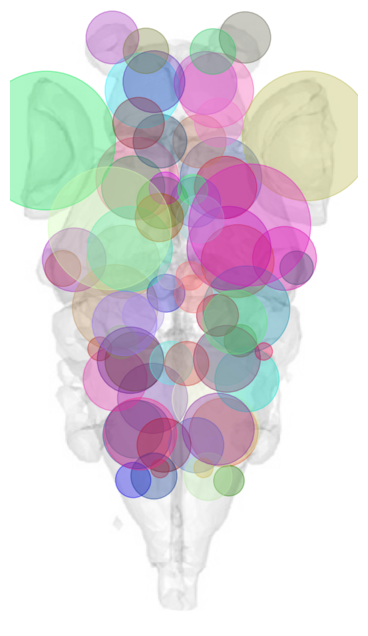

In [14]:
# Iterate Brain Region and create a scatter plots in the form of spheres
fig, ax = figure()
ax.imshow(bg_image, extent=[left, right, bottom, top])

import random

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

def calculate_radius(volume):
    # V = 4/3 * π * r^3 => r = (3V / 4π)^(1/3)
    return (3 * volume / (4 * math.pi)) ** (1/3)

# Iterate over brain regions
for region in brain_regions:
    # Calculate the radius of the circle to represent the sphere
    radius = calculate_radius(region.vol)

    # Plot the circle
    circle = plt.Circle((region.x, region.y), radius, color=random_color(), alpha=0.35)
    ax.add_patch(circle)

plt.show()

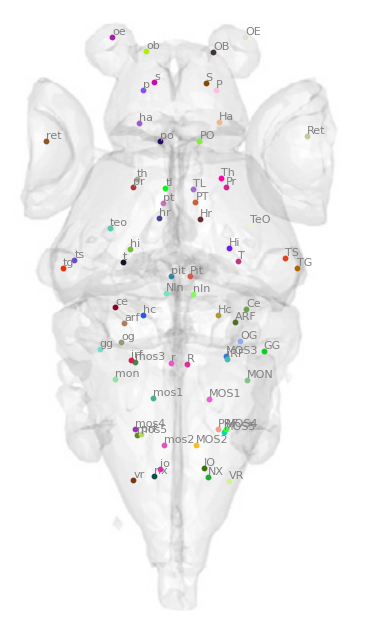

In [15]:
# Plot the regions and abbreviations, at first with random colors, no clusters
fig, ax = figure()
ax.imshow(bg_image, extent=[left, right, bottom, top])

# Iterate over brain regions and plot a small dot at each origin point
for region in brain_regions:
    ax.scatter(region.x, region.y, color=random_color(), s=10)  # s is the size of the dot
    ax.text(region.x, region.y, region.abbr, color='gray', fontsize=8, ha='left', va='bottom')

# Turn off the axes
ax.axis('off')

# Show the plot
plt.show()

[23.867360711097717, 5.315248250961304, 32.07308864593506, 16.72847080230713, 19.291127622127533, 26.402101635932922, 23.93102240562439, 20.8910071849823, 23.39743220806122, 19.349455416202545, 57.85648739337921, 61.129837453365326, 100.95572155714035, 101.64775848388672, 135.26182949543, 142.2251821756363, 123.91429197788239, 121.91722738742828, 164.77938503026962, 155.06419950723648, 157.78658813238144, 217.02747708559036, 143.76583397388458, 142.67776054143906, 22.398787558078766, 12.279552161693573, 8.776288032531738]
[23.867360591888428, 5.315248250961304, 32.073089599609375, 16.72847080230713, 19.291127920150757, 26.402103185653687, 23.93102216720581, 20.891006767749786, 23.397431910037994, 19.34945446252823, 57.85648852586746, 61.12983828783035, 100.95572406053543, 101.64776092767715, 135.2618311047554, 142.22518426179886, 123.91429382562637, 121.91722899675369, 164.7793863415718, 155.06420022249222, 157.7865887284279, 217.02747350931168, 143.76583576202393, 142.67776328325272, 

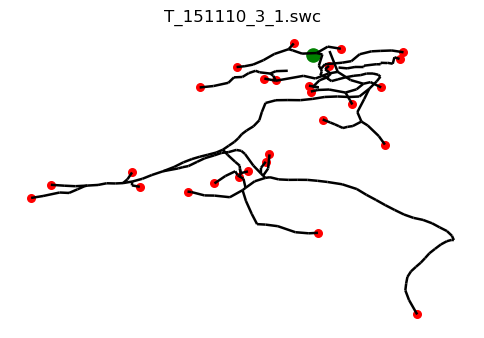

In [16]:
# This part figures out terminals and terminals length, it calculates terminals length and then
# checks the neurom terminal lengths to see if they match and we can use that
fig, ax = figure()


from neurom import NeuriteType
from scipy.spatial.distance import euclidean
from neurom.features.neurite import terminal_path_lengths

# Load the morphology
n = np.random.randint(low=0, high=len(neuron_paths))
m = nm.load_morphology(neuron_paths[n])

def is_within_soma_radius(segment_start, soma_center, soma_radius):
    distance_from_soma_center = euclidean(segment_start[:3], soma_center[:3])
    return distance_from_soma_center <= soma_radius

def accumulate_length(neurite, segment, accumulated_length, target_segment):
    segment_length = euclidean(segment[0][:3], segment[1][:3])
    new_accumulated_length = accumulated_length + segment_length

    # If this is the target segment, return the accumulated length
    if np.array_equal(segment[1][:3], target_segment[1][:3]):
        return new_accumulated_length

    # Check and accumulate length for child segments
    for child_segment in nm.iter_segments(neurite):
        if np.array_equal(segment[1][:3], child_segment[0][:3]):
            # Recursive call to follow the path
            path_length = accumulate_length(neurite, child_segment, new_accumulated_length, target_segment)
            if path_length is not None:
                return path_length

    return None

# compute the path to terminal so we can understand which of the terminal path lengths is the correct one because
# neurom doesn't give us the position of the terminals when calculating paths
def calculate_path_length_to_segment(neurite, soma_center, soma_radius, terminal):
  for segment in nm.iter_segments(neurite):
      if is_within_soma_radius(segment[0][:3], soma_center, soma_radius):
        path_length = accumulate_length(neurite, segment, 0, terminal)
        if path_length is not None:
            return path_length

def find_terminal_points(morphology, skip_terminal_length=True):
    # Collect all start points in a set for quick lookup
    terminals = []
    terminals_length = []
    start_points = {tuple(segment[0][:3]) for neurite in morphology.neurites for segment in nm.iter_segments(neurite)}
    # Find all terminals: if the end of a segment is not in start_points, it's a terminal
    for neurite in morphology.neurites:
      for segment in nm.iter_segments(neurite):
        if tuple(segment[1][:3]) not in start_points: # since it's not part of the start of segment, it ends dead track -> terminal
          terminals.append(segment[1][:3])
          # find the length to that segment
          if not skip_terminal_length:
            path_length = calculate_path_length_to_segment(neurite, morphology.soma.center, morphology.soma.radius, segment)
            terminals_length.append(path_length)

    if skip_terminal_length:
      return terminals
    else:
      return (terminals, terminals_length)

terminals, terminals_length = find_terminal_points(m, False)

plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.8, color='k', alpha=1.0)
plt.scatter(m.soma.center[0], m.soma.center[1], s=90, color='g')

path_lengths = []
for neurite in m.neurites:
  path_lengths.extend(terminal_path_lengths(neurite))

# Plot all outputs (axon terminals)
for terminal in terminals:
    plt.scatter(terminal[0], terminal[1], s=30, color='r')  # Plot axon terminals

print(terminals_length)
print(path_lengths)

# by looking at these two arrays we can conclude that the path_lengths has the same order as terminals, so we'll use that instead because it's faster


There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length
There is mismatch in terminals and terminals length


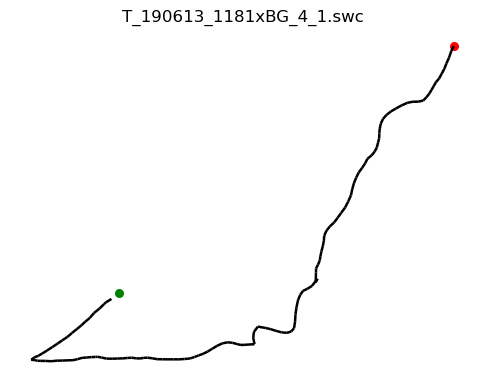

In [17]:
# Compute morphology, terminals, terminals length for all neurons
class ExtendedNeuron:
    def __init__(self, morphology, terminals, terminals_length):
        self.morphology = morphology
        self.terminals = terminals
        self.terminals_length = terminals_length

# Load and process morphologies
augmented_neurons = []
for i, path in enumerate(neuron_paths):
    try:
        morphology = nm.load_morphology(path)  # Load morphology
        terminals = find_terminal_points(morphology)  # Find terminal points

        path_lengths = []
        for neurite in morphology.neurites:
          path_lengths.extend(terminal_path_lengths(neurite))

        if len(terminals) != len(path_lengths):
          print('There is mismatch in terminals and terminals length')

        augmented_neurons.append(ExtendedNeuron(morphology, terminals, path_lengths))  # Create ExtendedNeuron
    except Exception as e:
        print(f"Failed to process neuron {path}: {e}")

# take a specific extended neuron and plot it
n = np.random.randint(low=0, high=len(augmented_neurons))
curr_neuron = augmented_neurons[n]

fig, ax = figure()

plot_morph(curr_neuron.morphology,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.8, color='k', alpha=1.0)
plt.scatter(curr_neuron.morphology.soma.center[0], curr_neuron.morphology.soma.center[1], s=30, color='g')

for terminal in curr_neuron.terminals:
    plt.scatter(terminal[0], terminal[1], s=30, color='r')  # Plot axon terminals
    
# we ignore the mismatch for now


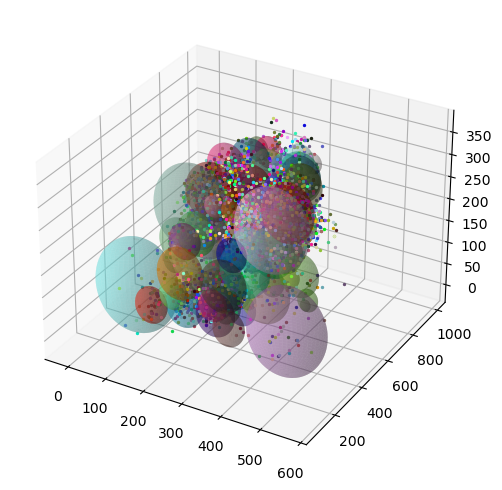

In [18]:
# Plot regions and extended neurons for visualization in 3D
# Iterate Brain Region and create a scatter plots in the form of spheres, also plot on top the neurons soma
fig = figure()
ax = plt.axes(projection='3d')
#ax.imshow(bg_image, extent=[left, right, bottom, top])

def calculate_radius(volume):
    # V = 4/3 * π * r^3 => r = (3V / 4π)^(1/3)
    return (3 * volume / (4 * math.pi)) ** (1/3)

# Iterate over brain regions
for region in brain_regions:
    # Calculate the radius of the circle to represent the sphere
    radius = calculate_radius(region.vol)

    # Plot the circle
    # circle = plt.Circle((region.x, region.y, region.z), radius, color=random_color(), alpha=0.35)
    # ax.add_patch(circle)
    phi, theta = np.mgrid[0.0:2.0*np.pi:100j, 0.0:np.pi:50j]
    x = region.x + radius * np.sin(theta) * np.cos(phi)
    y = region.y + radius * np.sin(theta) * np.sin(phi)
    z = region.z + radius * np.cos(theta)

    ax.plot_surface(x, y, z, color=random_color(), alpha=0.35)

for neuron in augmented_neurons:
  try:
    soma = neuron.morphology.soma
    ax.scatter(soma.center[0], soma.center[1], soma.center[2], color=random_color(), s=2)

  except:
    pass

plt.show()

In [19]:
# Plot better connectivity matrix than the previous one based on actual brain region volumes
# Identify all the connections between differents regions and create a strength map where the strength is composed of all neurites length
connectivityMatrix = np.zeros((len(brain_regions), len(brain_regions)))

def calculate_radius(volume):
    # V = 4/3 * π * r^3 => r = (3V / 4π)^(1/3)
    return (3 * volume / (4 * math.pi)) ** (1/3)

def is_point_in_sphere(center, point, radius):
    # Unpack the center and point coordinates
    x_c, y_c, z_c = center
    x_p, y_p, z_p = point

    # Calculate the Euclidean distance between the center of the sphere and the point
    distance = math.sqrt((x_p - x_c)**2 + (y_p - y_c)**2 + (z_p - z_c)**2)

    # Check if the distance is less than or equal to the radius
    return distance <= radius

def find_region_for_neuron(curr_neuron, curr_brain_regions):
  for reg in curr_brain_regions:
    radius = calculate_radius(reg.vol)
    if is_point_in_sphere((reg.x, reg.y, reg.z), (curr_neuron[0], curr_neuron[1], curr_neuron[2]), radius):
      return reg

# for each soma
for neuron in augmented_neurons:
  # find in what brain region does this soma fall into
  region = find_region_for_neuron(neuron.morphology.soma.center, brain_regions)
  if region:
    # for every output, find all the regions it connects to
    for i, terminal in enumerate(neuron.terminals):
      connected_region = find_region_for_neuron([terminal[0], terminal[1], terminal[2]], brain_regions)
      if connected_region and neuron.terminals_length[i]:
        connectivityMatrix[region.idx][connected_region.idx] += neuron.terminals_length[i]

# normalize by the total brain volume of regions
for i in range(len(brain_regions)):
  for j in range(len(brain_regions)):
    total_volume = calculate_radius(brain_regions[i].vol) * calculate_radius(brain_regions[j].vol)
    if total_volume > 0:
        connectivityMatrix[i, j] = connectivityMatrix[i, j] / total_volume
    else:
        connectivityMatrix[i, j] = 0

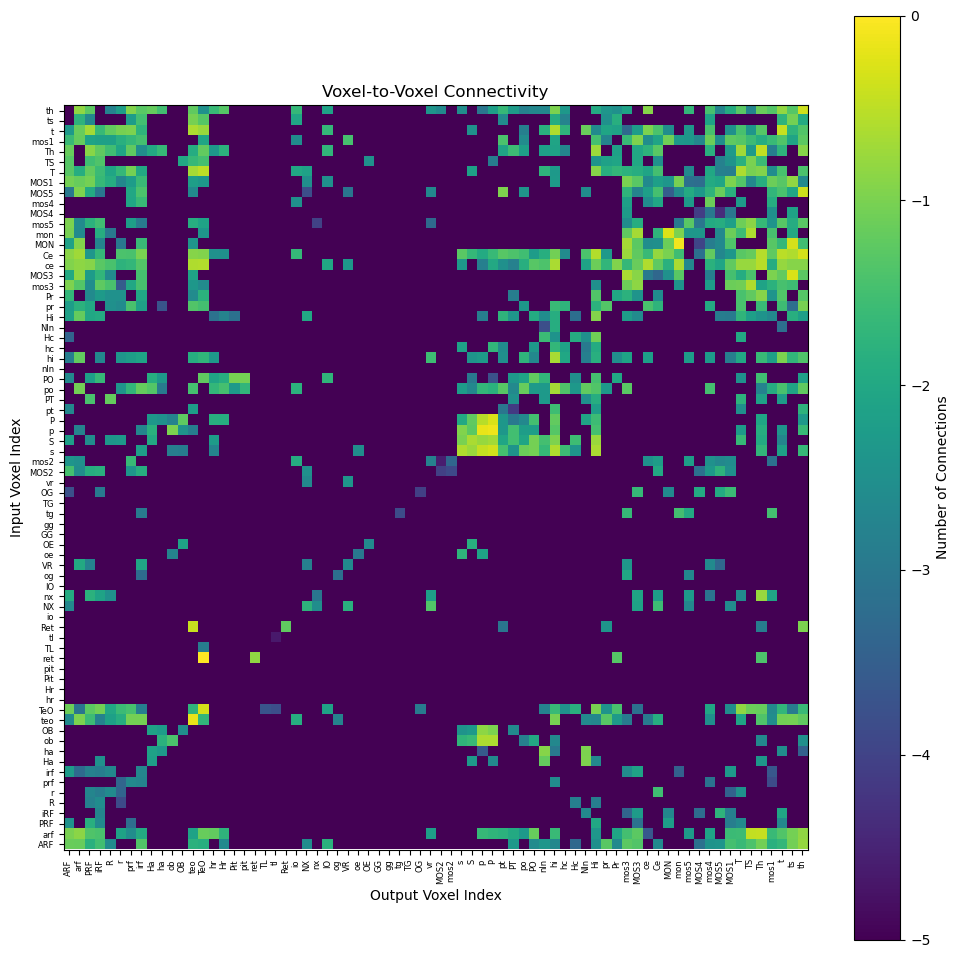

In [20]:
# Plot the connectivity matrix and regions abbr
from matplotlib.colors import LogNorm
fig, ax = plt.subplots(figsize=(12, 12))

# data processing
connectivityMatrix[connectivityMatrix <= 0] = np.min(connectivityMatrix[connectivityMatrix > 0])
log_connectivityMatrix = np.log10(connectivityMatrix)

min_log_val = np.min(log_connectivityMatrix)
max_log_val = np.max(log_connectivityMatrix)
scaled_log_connectivityMatrix = -5 + (log_connectivityMatrix - min_log_val) / (max_log_val - min_log_val) * 5

connectivityMatrix_in = np.flip(scaled_log_connectivityMatrix, axis=1)

# Create the heatmap
cax = ax.imshow(connectivityMatrix_in, interpolation='nearest')


# Add a color bar
cbar = fig.colorbar(cax)
cbar.set_label('Number of Connections')

# Add labels and title (optional)
ax.set_xlabel('Output Voxel Index')
ax.set_ylabel('Input Voxel Index')
ax.set_title('Voxel-to-Voxel Connectivity')

# get brain_region_abbreviations
brain_region_abbreviations = []
for region in brain_regions:
  brain_region_abbreviations.append(region.abbr)

ax.set_xticks(np.arange(len(brain_region_abbreviations)))
ax.set_yticks(np.arange(len(brain_region_abbreviations)))
ax.set_xticklabels(brain_region_abbreviations[::-1], rotation=90, fontsize=6)  # Rotate x labels for better readability
ax.set_yticklabels(brain_region_abbreviations, fontsize=6)

# Show the plot
plt.show()

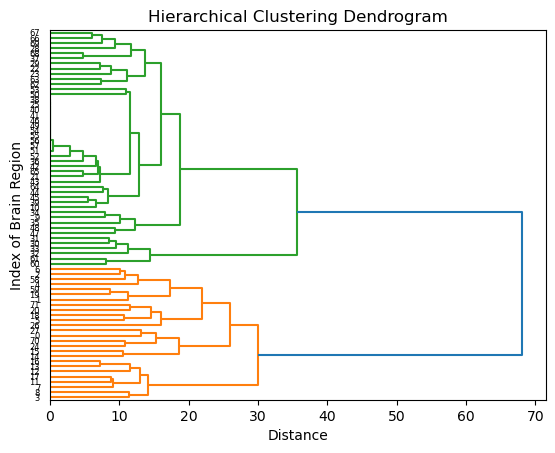

In [21]:
# Perform herarchical clustering to the above connectivity matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Assuming 'connectivityMatrix' is your NumPy array
# Calculate the linkage matrix using Ward's method
# You can also try other methods like 'single', 'complete', 'average', etc.
linkage_matrix = linkage(connectivityMatrix_in, method='ward')

# Plot the dendrogram
plt.figure()
dendrogram(linkage_matrix, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Index of Brain Region')
plt.show()

In [ ]:
# Perform clustering based on linkage matrix, used a lower threshold for more regions
from scipy.cluster.hierarchy import fcluster

color_threshold = 30  # Adjust based on your dendrogram's color changes

# Assign cluster labels based on the color_threshold
cluster_labels = fcluster(linkage_matrix, color_threshold, criterion='distance')
unique_labels, counts_labels = np.unique(cluster_labels, return_counts=True)
color_cluster_counts = dict(zip(unique_labels, counts_labels))
print(color_cluster_counts)